#### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
from tqdm import tqdm
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [5]:
# Расчёт веса через номер соседа: 
# w_i = (k - i + 1)/k

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Инициализируем вектор весов для k соседей
        W = [(k - i + 1)/k for i in range(k)]
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        
        for i, d in enumerate(sorted(test_distances)[0:k]):
            classes[d[1]] += W[i]
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


#### 2*. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [8]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [9]:
# Функция подсчёта метрики качества кластеризации через внутриклассовое расстояние

def mean_square_distance_inside_class(distances):
    
    return np.sum(distances) / len(distances)
    

In [10]:
def kmeans(data, k, max_iterations):
    
    # Список для хранения метрик качества на каждой итерации
    quality_result = []
    
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # Словарь расстояний для оценки метрики качества
    dict_distances = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
            dict_distances[classification].append(min(distances))
        
        # Посчитаем метрику качества quality
        quality = 0
        for i in range(len(centroids)):
            quality += mean_square_distance_inside_class(dict_distances[i])
        
        quality_result.append(quality)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # Ищем метрику выбранную метрику для текущих разбиений
        
        
        # сравним величину смещения центроидов с метрикой качества
        
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > quality:
                optimal = False
                
        # если все смещения меньше минимизированной метрики, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes, np.mean(quality_result)

In [11]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [12]:
# определим максимальное количество итераций
max_iterations = 1

# сразу определим известное нам количество кластеров
k = 10

In [13]:
quality_list = []
k_list = []

for i in tqdm(range(1, k + 1)):
    centroids, clusters, quality = kmeans(X, i, max_iterations)
    k_list.append(i)
    quality_list.append(quality)

100%|██████████| 10/10 [00:00<00:00, 119.37it/s]


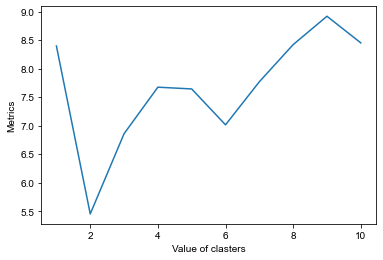

In [14]:
%matplotlib inline
plt.plot(k_list, quality_list)
plt.xlabel('Value of clasters')
plt.ylabel('Metrics')
sns.set()